## Graphing NFL Possessing Teams Win Percentage based on Game Situation

Similar to previous project in which I evaluated NFL Playcalling Tendencies based on Game Situation, but instead looking at a teams win probability based on Point Differential and game time remaining


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [62]:
plays = pd.read_csv('/home/travis/shared/NFL/Analysis/WinProbability/Data/WinProb.csv')

plays.describe()

,gsis_id,drive_id,home_score,away_score,home_win
count,3.620040e+05,362004.000000,362004.000000,362004.000000,362004.000000
mean,2.012664e+09,12.344043,11.832983,10.437852,0.565394
std,2.292646e+06,7.168458,10.218419,9.563541,0.495706
min,2.009091e+09,1.000000,0.000000,0.000000,0.000000
25%,2.011091e+09,6.000000,3.000000,3.000000,0.000000
50%,2.013091e+09,12.000000,10.000000,7.000000,1.000000
75%,2.015091e+09,18.000000,17.000000,17.000000,1.000000
max,2.017010e+09,35.000000,62.000000,59.000000,1.000000


In [64]:
plays['pointdiff']=0
plays.loc[plays['pos_team']== plays['home'], 'pointdiff']= plays.loc[plays['pos_team']== plays['home'], 'home_score']- plays.loc[plays['pos_team']== plays['home'], 'away_score']
plays.loc[plays['pos_team']== plays['away'], 'pointdiff']= plays.loc[plays['pos_team']== plays['away'], 'away_score']- plays.loc[plays['pos_team']== plays['away'], 'home_score']

In [65]:
plays.head()

,gsis_id,drive_id,pos_team,home,home_score,away,away_score,quarter,time,home_win,pointdiff
0,2009091000,1,TEN,PIT,0,TEN,0,1,0,1,0
1,2009091000,1,PIT,PIT,0,TEN,0,1,93,1,0
2,2009091000,1,PIT,PIT,0,TEN,0,1,85,1,0
3,2009091000,1,PIT,PIT,0,TEN,0,1,7,1,0
4,2009091000,1,PIT,PIT,0,TEN,0,1,44,1,0


In [66]:
plays['win']=False
plays.loc[plays['pos_team']== plays['home'], 'win']= plays['home_win'].astype(bool)
plays.loc[plays['pos_team']== plays['away'], 'win']= ~plays['home_win'].astype(bool)

In [67]:
plays.head()

,gsis_id,drive_id,pos_team,home,home_score,away,away_score,quarter,time,home_win,pointdiff,win
0,2009091000,1,TEN,PIT,0,TEN,0,1,0,1,0,False
1,2009091000,1,PIT,PIT,0,TEN,0,1,93,1,0,True
2,2009091000,1,PIT,PIT,0,TEN,0,1,85,1,0,True
3,2009091000,1,PIT,PIT,0,TEN,0,1,7,1,0,True
4,2009091000,1,PIT,PIT,0,TEN,0,1,44,1,0,True


In [68]:
plays=plays[plays['quarter']!='T']

plays['time'] = plays['time'].apply(pd.to_numeric, errors='coerce')
plays=plays[~plays['time'].isnull()]

In [69]:
#Convert (Quarters played, time elapsed in quarter) to game time.
#quarter = 15 minutes 
#ie. (Quarter 3, 2 ) = (3-1) quarters played * 15 + 2 =32

plays['time']=plays['time']/60
#2nd quarter
plays.loc[plays['quarter']== '2', 'time']= plays.loc[plays['quarter']== '2', 'time']+15
#3rd quarter
plays.loc[plays['quarter']== '3', 'time']= plays.loc[plays['quarter']== '3', 'time'] + 30

#4th quarter
plays.loc[plays['quarter']== '4', 'time']= plays.loc[plays['quarter']== '4', 'time']+ 45

#plays.loc[plays['quarter']== 'T', 'time']= plays.loc[plays['quarter']== 'T', 'time']+ 60

In [70]:
plays=plays.round({'time' : 0})

## Graph

In [147]:
grouped=plays.groupby(['pointdiff', 'time'])
grouped=grouped.filter(lambda x: len(x) > 10)
pdBytime=grouped.groupby(['pointdiff','time']).agg({'win': 'mean'})
s=pdBytime.index.tolist()
x=zip(*s)

In [129]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


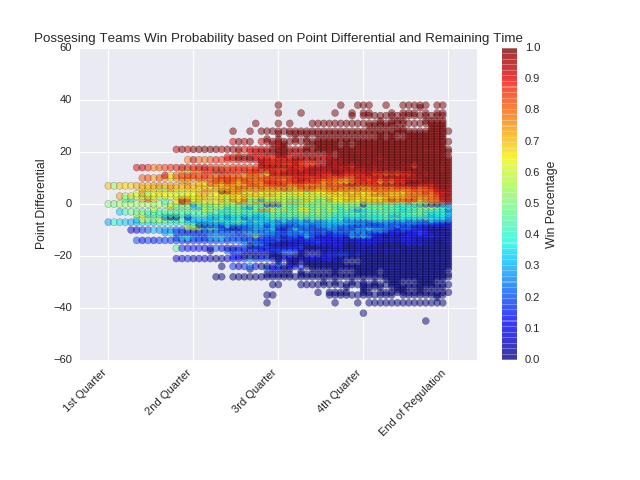

In [148]:
fig, ax = plt.subplots(facecolor='w')
plt.scatter(x[1], x[0], c=pdBytime['win'], cmap= 'jet', alpha=0.5, s=40)
cbar=plt.colorbar()
cbar.set_label('Win Percentage')
ax.set_xticks([0,15,30, 45,60])
ax.set_xticklabels(['1st Quarter','2nd Quarter', '3rd Quarter', '4th Quarter', 'End of Regulation'])
ax.set_xlim(-5,65)
ax.set_ylabel('Point Differential')

xAxis = ax.xaxis

for item in xAxis.get_ticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment("right")
    
plt.subplots_adjust(bottom=0.25)

plt.title('Possesing Teams Win Probability based on Point Differential and Remaining Time')